In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression, make_moons
import matplotlib.pyplot as plt

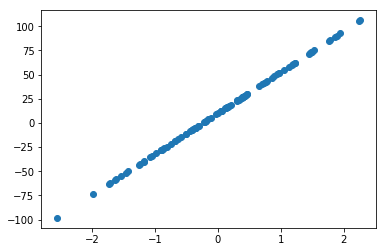

In [35]:
np.random.seed(0)
x,y=make_regression(n_samples=100,n_features=1,bias=10)
plt.scatter(x,y)

In [33]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [38]:
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [39]:
## reshape x with new columns ones to use bias
X=np.hstack((x,np.ones(x.shape))) 
print(X.shape)

(100, 2)


## CREATE $\theta$

In [40]:
np.random.seed(0)
theta =np.random.randn(2,1)
print(theta)

[[1.76405235]
 [0.40015721]]


## CREATE FUNCTION  f=X.$\theta$

In [41]:
def function(X,theta):
    return X.dot(theta)

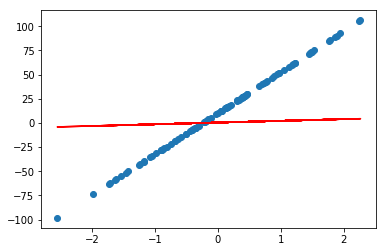

In [42]:
plt.scatter(x,y)
plt.plot(x, function(X,theta), c='r')

## function cout  MSE (mean squar error) 
$J(\theta)=\frac{1}{2m}\sum(X.\theta -y)^2$

In [43]:
def cost_function (X,theta,y):
    m=len(y)
    return 1/(2*m)*(np.sum(function(X,theta)-y)**2)

In [44]:
cost_function(X,theta,y)

7235.240521374461

## Gradient
$ \frac{\partial j(\theta)}{\partial\theta} = \frac{1}{m} X^T . (X.\theta -y)$

In [45]:
def gradient (X, theta, y):
    m=len(y)
    return 1/m *X.T.dot( function(X,theta)-y)

In [46]:
gradient(X, theta, y)

array([[-41.9838032 ],
       [-12.02933125]])

## gradient descente
$ \theta = \theta - \alpha. \frac { \partial (\theta)}{\partial \theta}$


In [80]:
def gradient_descent(X,y,theta, lr, n):
    for i in range (0, n):
        cost_history= np.zeros(n)
        theta = theta - lr*gradient(X,theta,y)
        cost_history[i]= cost_function(X,theta, y)
        return theta, cost_history

In [115]:
n = 1000
lr = 0.97
theta_final, cost_history = gradient_descent(X,y,theta,lr,n)

prediction= function(X, theta_final)

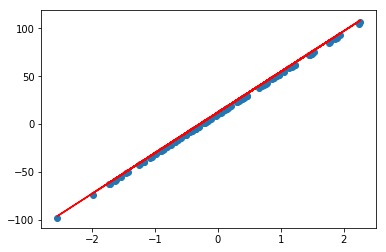

In [116]:
plt.scatter(x,y)
plt.plot(x,prediction, c="r")

In [117]:
# calcule du R2 coeficien de determination 


def coef_determination (y, pred):
    u= ((y-pred)**2).sum()
    d= ((y-y.mean())**2).sum()
    return 1- u/d
    


In [118]:
r2=coef_determination(y,prediction)
r2

0.9976353684387508

In [119]:
theta_final

array([[42.48834145],
       [12.06860853]])